##### CIS435: Practical Data Science with Machine Learning
##### Assignment 4: Deep Learning Case Study
## Breast Cancer Prediction of Malignant or Benign
Author: Mark Cody
Date: March 7, 2021

Purpose: Use Breast Cancer Wisconsin (Diagnostic) Data Set and deep learning algorithms to predict whether the cancer is benign or malignant. Two models are used:
- Multilayer Perceptron
- Convolutional Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Data Understanding and Quality
We begin with reading the dataset from the file bdata.csv and examining its characteristics and quality. 

In [2]:
data = pd.read_csv('bdata.csv')

In [3]:
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,1


In [4]:
data.shape

(569, 23)

In [5]:
data.isnull().any()

id                        False
radius_mean               False
texture_mean              False
perimeter_mean            False
area_mean                 False
smoothness_mean           False
compactness_mean          False
concavity_mean            False
concave points_mean       False
symmetry_mean             False
fractal_dimension_mean    False
radius_se                 False
texture_se                False
perimeter_se              False
area_se                   False
smoothness_se             False
compactness_se            False
concavity_se              False
concave points_se         False
symmetry_se               False
fractal_dimension_se      False
radius_worst              False
diagnosis                 False
dtype: bool

In [6]:
data.duplicated().value_counts()

False    569
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

In [8]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,diagnosis
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,1.000000


In [9]:
features = data.columns

#### Exploratory Data Analysis (EDA)

In [10]:
#EDA is published as a stand-alone report with sweetviz.
#Upon running this cell the report appears in a new browser tab.
import sweetviz as sv
data_report = sv.analyze(data)
data_report.show_html('Breast_Cancer_Data_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Breast_Cancer_Data_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Machine Learning Models
We begin by splitting the dataset into independent and dependent variables, where diagnosis is the dependent variable.

In [11]:
#Create training and testing datasets
from sklearn.model_selection import train_test_split
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
#Split X and y into train and test sets with proportion 75%/25%.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)

In [12]:
#Neural networks require similar scaling among dimensions. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Multilayer Perceptron

In [13]:
# Import the classifier from scikit-learn. 
from sklearn.neural_network import MLPClassifier

In [14]:
# Instantiate the classifier
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)

In [15]:
# Train the model
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [16]:
# Score the model
print("Training accuracy: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Testing accuracy: {:.3f}".format(
    mlp.score(X_test_scaled, y_test)))

Training accuracy: 0.972
Testing accuracy: 0.972


In [17]:
# Make predictions
mlp_pred = mlp.predict(X_test_scaled)
mlp_pred[:5]

array([0, 1, 1, 0, 0])

In [18]:
# Evaluate the model with a Confusion Matrix
from sklearn.metrics import confusion_matrix
mlpcm = confusion_matrix(y_test, mlp_pred)
print(mlpcm)

[[89  0]
 [ 4 50]]


In [19]:
# Evaluate the model with a Precision/Recall table
from sklearn.metrics import classification_report
mlppr = classification_report(y_test, mlp_pred) 
print(mlppr)

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        89
          1       1.00      0.93      0.96        54

avg / total       0.97      0.97      0.97       143



In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

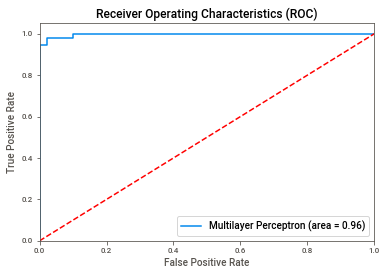

In [22]:
# Display the Receiver Operating Characteristics (ROC) graph
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
fpr, tpr, thresholds = roc_curve(y_test, 
                                 mlp.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, 
         label='Multilayer Perceptron (area = %0.2f)' % mlp_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC)')
plt.legend(loc="lower right")
plt.savefig('mlp_ROC')
plt.show()

In [24]:
# Calculate the Area Under the Curve (AUC)
from sklearn import metrics
mlpauc = metrics.auc(fpr, tpr)
print('AUC: %.3f' % mlpauc)

AUC: 0.997
